In [1]:
import pystac_client
import planetary_computer as pc

import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

In [2]:
# reduce box has to be in itemid scene
# same function as in TRIALS_improving_training_set

def open_window_in_scene(itemid, reduce_box):
    # accesing Azure storage using pystac client
    URL = "https://planetarycomputer.microsoft.com/api/stac/v1"
    catalog = pystac_client.Client.open(URL)
    
    itemid = itemid,
    search = catalog.search(
        collections=["naip"],
        ids = itemid
    )
    item = list(search.get_items())[0]
    # sign and open item
    href = pc.sign(item.assets["image"].href)
    ds = rasterio.open(href)


    reduce = gpd.GeoDataFrame({'geometry':[reduce_box]}, crs="EPSG:4326")
    reduce = reduce.to_crs(ds.crs)

    win = ds.window(*reduce.total_bounds)
    subset = rasterio.open(href).read([1,2,3,4], window=win)
    return subset

In [9]:
# image is a (4,m,n) np array in which bands are r,g,b,nir

def select_ndvi_df(image,thresh=0.2):
    # reshape image into a np.array where each row is a pixel and the columns are the bands
    pixels = image.reshape([4,-1]).T
    df = pd.DataFrame(pixels, columns=['r','g','b','nir'])
    df['ndvi']=(df.nir.astype('int16') - df.r.astype('int16'))/(df.nir.astype('int16') + df.r.astype('int16'))
    vegetation = df[df.ndvi>thresh]
    vegetation.drop(labels=['ndvi'],axis=1, inplace=True)
    return vegetation

# ---------------------------------

def df_backto_image(image, df):
    reconstruct = np.zeros((image.shape[1],image.shape[2]))
    for n in df.index:
        i = int((n)/reconstruct.shape[1])
        j = (n) % reconstruct.shape[1]
        reconstruct[i][j] = 1
    return reconstruct

In [3]:
itemid = 'ca_m_3411934_sw_11_060_20180722_20190209'

#Only Campus Point
reduce_box = Polygon([
    [-119.8534713523,34.4028697719],
    [-119.8409772016,34.4028697719],
    [-119.8409772016,34.4129840686],
    [-119.8534713523,34.4129840686],
    [-119.8534713523,34.4028697719]])

In [4]:
subset = open_window_in_scene(itemid, reduce_box)

In [6]:
veg = select_ndvi_df(subset)

/tmp/ipykernel_722/163356856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegetation.drop(labels=['ndvi'],axis=1, inplace=True)


,r,g,b,nir
30,95,92,98,156
33,101,102,103,157
34,98,100,99,148
35,93,95,98,142
36,82,81,89,153
...,...,...,...,...
3780676,37,48,62,56
3780679,33,46,62,52
3780680,40,49,64,62
3780681,38,48,63,68


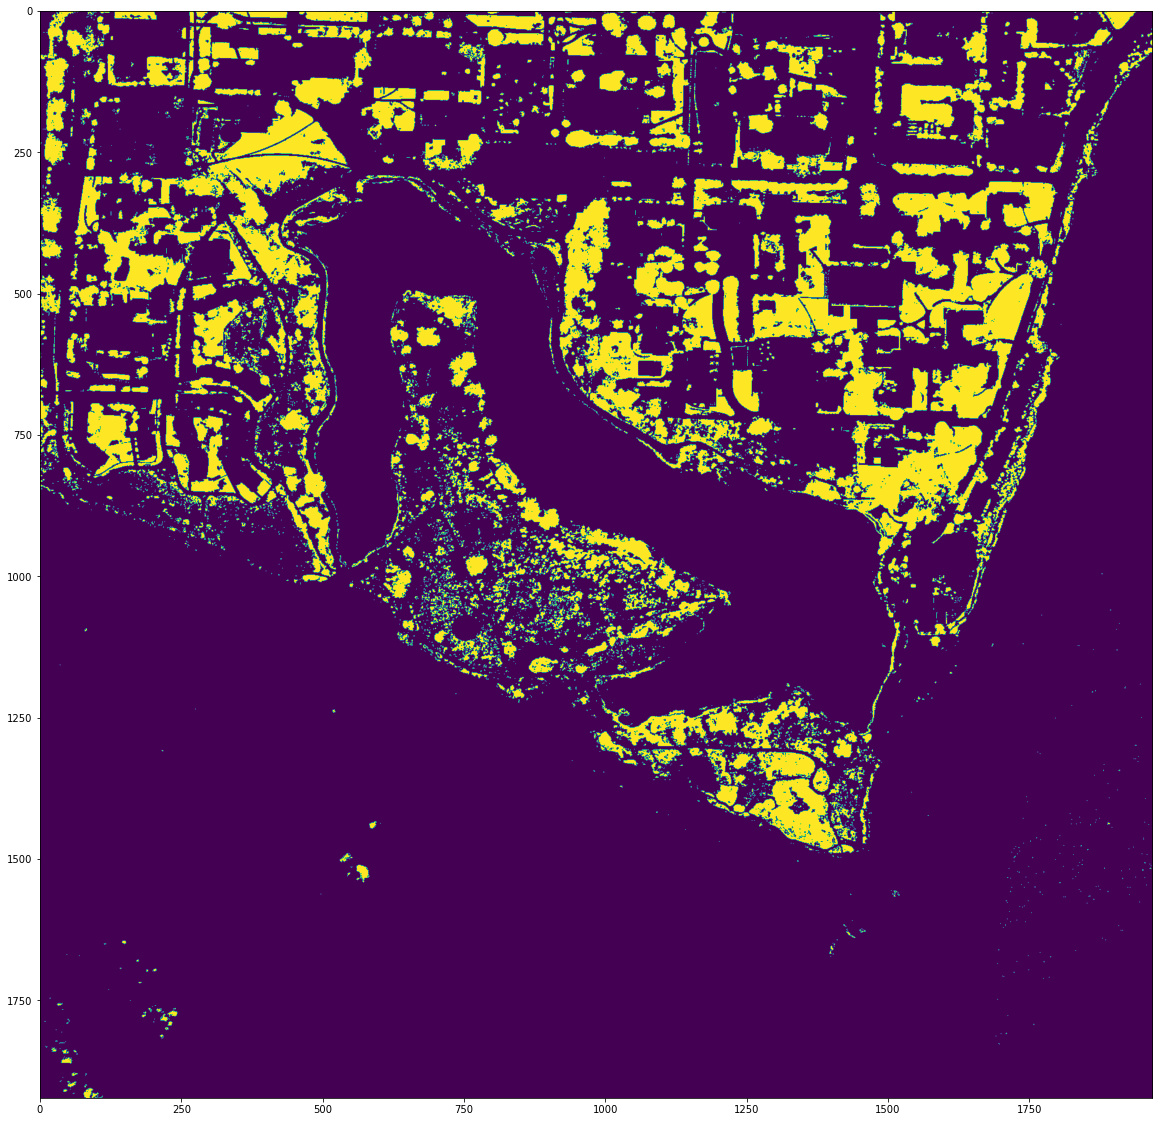

In [10]:
reconstructed = df_backto_image(subset,veg)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(reconstructed)
plt.show()

/tmp/ipykernel_722/4021264556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegetation.drop(labels=['ndvi'],axis=1, inplace=True)


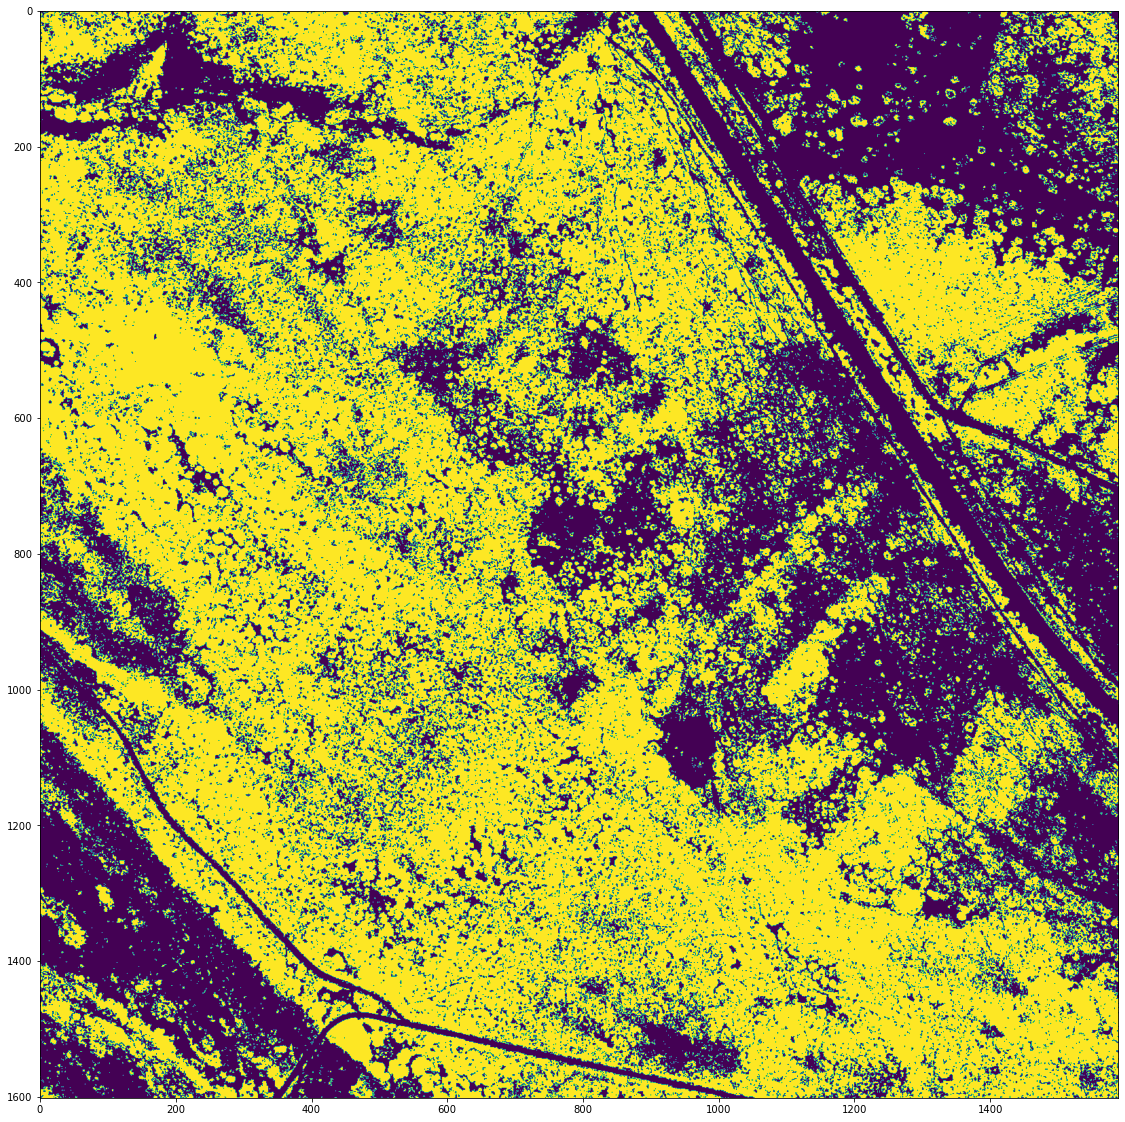

In [11]:
itemid = 'ca_m_3412037_nw_10_060_20180913_20190208'
reduce_box = Polygon([
    [-120.4694755983,34.4526766824],
    [-120.4593511485,34.4526766824],
    [-120.4593511485,34.4611333067],
    [-120.4694755983,34.4611333067],
    [-120.4694755983,34.4526766824]])

subset = open_window_in_scene(itemid, reduce_box)
veg = select_ndvi_df(subset)
reconstructed = df_backto_image(subset,veg)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(reconstructed)
plt.show()

/tmp/ipykernel_722/4021264556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegetation.drop(labels=['ndvi'],axis=1, inplace=True)


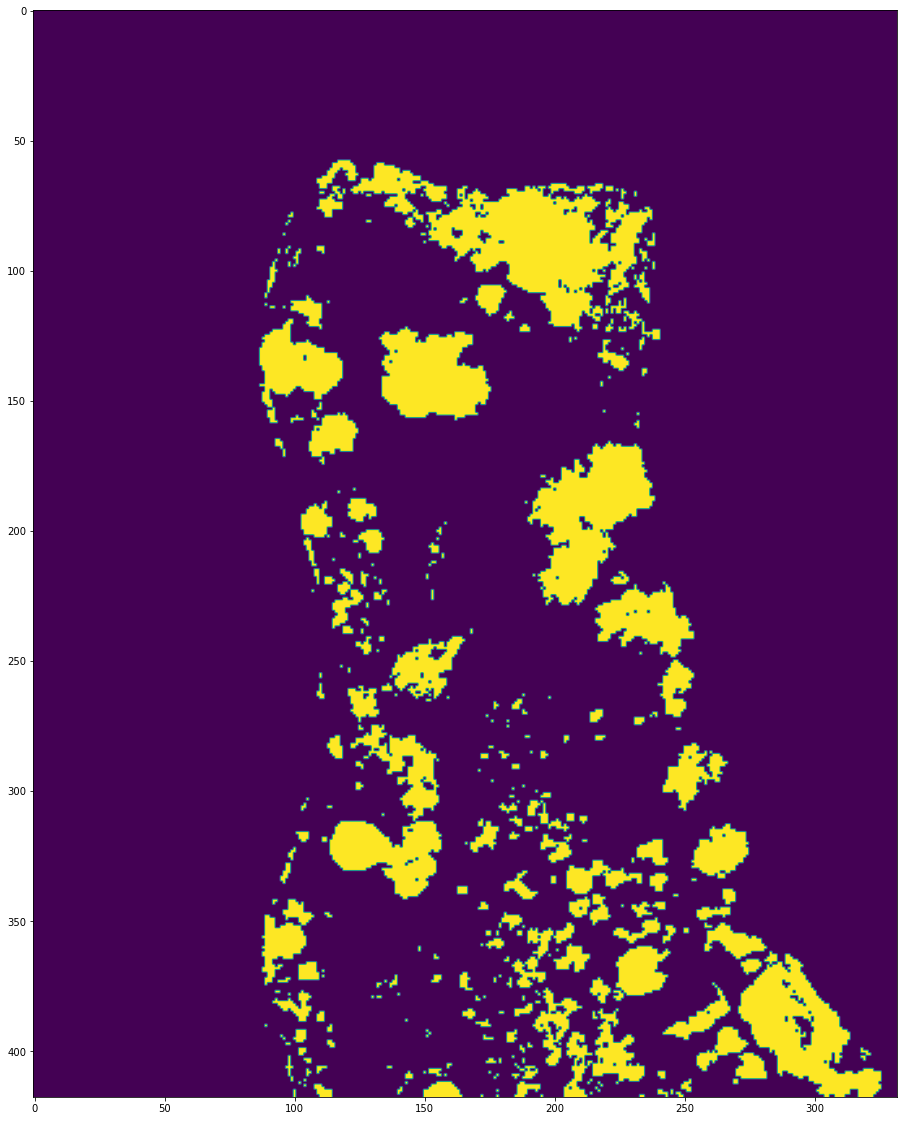

In [12]:
itemid = 'ca_m_3411934_sw_11_060_20180722_20190209'
reduce_box = Polygon([[-119.8501890501,34.4084820176],
                      [-119.8480929505,34.4084820176],
                      [-119.8480929505,34.4106942936],
                      [-119.8501890501,34.4106942936],
                      [-119.8501890501,34.4084820176]])

subset = open_window_in_scene(itemid, reduce_box)
veg = select_ndvi_df(subset)
reconstructed = df_backto_image(subset,veg)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(reconstructed)
plt.show()

